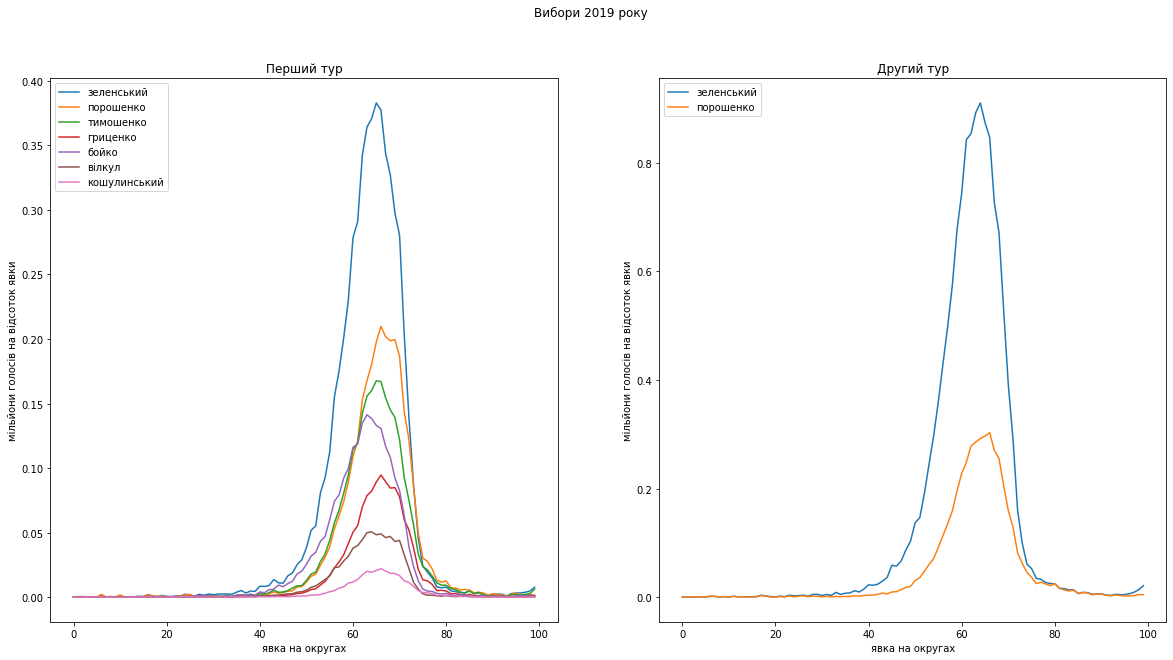

In [1]:

import matplotlib.pyplot as plt
from parse_tvk_data import *

first2019 = prepare_data(
    parse_election_tvk_data("vp2019","wp335pt001f01=719",ua),
    lambda row: int(row[9])/int(row[2]),
    {"зеленський": 24,"порошенко": 40, "тимошенко": 46, "гриценко": 20, "бойко": 15,"вілкул": 18,  "кошулинський": 29}
)
second2019 = prepare_data(
    parse_election_tvk_data("vp2019","wp335pt001f01=720",ua),
    lambda row: int(row[9])/int(row[2]),
    {"зеленський": 11, "порошенко": 12}
)

fig=plt.figure()
fig.set_size_inches(20 , 10, forward=True)
fig.suptitle("Вибори 2019 року")
fig.show()

ax=fig.add_subplot(121)
for name in first2019.keys():
    ax.plot(list(range(100)),first2019[name], label=name)
    pass
ax.title.set_text("Перший тур")
ax.set_xlabel("явка на дільницях")
ax.set_ylabel("мільйони голосів на відсоток явки")
ax.legend(loc=2)

ax=fig.add_subplot(122)
for name in second2019.keys():
    ax.plot(list(range(100)),second2019[name], label=name)
    pass
ax.title.set_text("Другий тур")
ax.set_xlabel("явка на дільницях")
ax.set_ylabel("мільйони голосів на відсоток явки")
ax.legend(loc=2)

plt.draw()


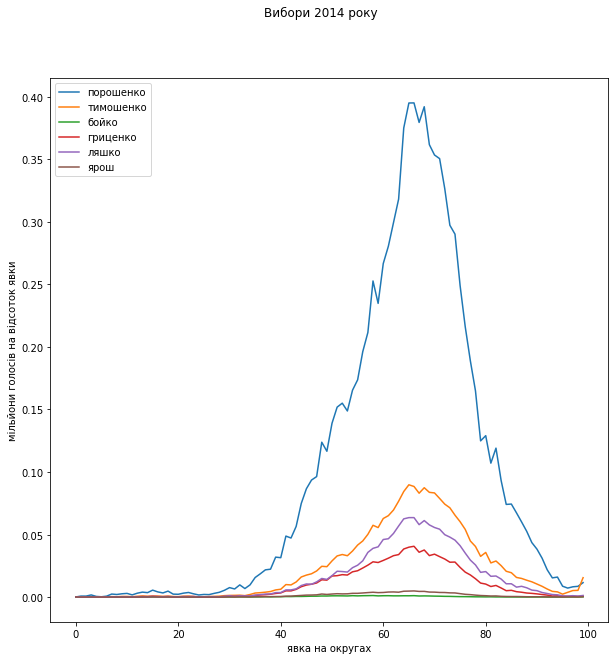

In [2]:

import matplotlib.pyplot as plt
from parse_tvk_data import *

first2014 = prepare_data(
    parse_election_tvk_data("vp2014","wp335pt001f01=702",ua),
    lambda row: int(row[9])/int(row[2]) if int(row[2])>0 else 0,
    {"порошенко": 22, "тимошенко": 26,"бойко": 12,"гриценко": 14,"ляшко":20, "ярош": 31}
)

fig=plt.figure()
fig.set_size_inches(10 , 10, forward=True)
fig.suptitle("Вибори 2014 року")
fig.show()

ax=fig.add_subplot(111)
for name in first2014.keys():
    ax.plot(list(range(100)),first2014[name], label=name)
    pass
ax.set_xlabel("явка на дільницях")
ax.set_ylabel("мільйони голосів на відсоток явки")
ax.legend(loc=2)

plt.draw()


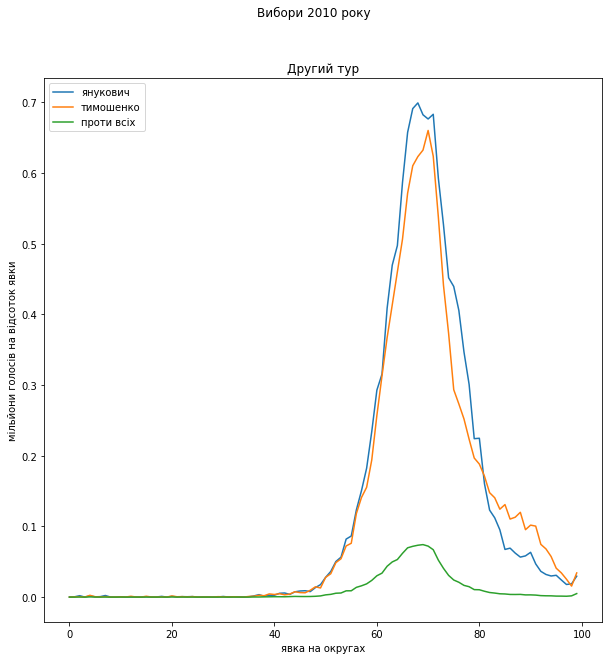

In [3]:
import matplotlib.pyplot as plt
from parse_tvk_data import *

second2010 = prepare_data(
    parse_election_tvk_data("vp2010","WP3355191.html?PT001F01=701",ua),
    lambda row: int(row[2])/int(row[1]),
    {"янукович": 5, "тимошенко": 4, "проти всіх": 6}
)

fig=plt.figure()
fig.set_size_inches(10 , 10, forward=True)
fig.suptitle("Вибори 2010 року")
fig.show()

ax=fig.add_subplot(111)
for name in second2010.keys():
    ax.plot(list(range(100)),second2010[name], label=name)
    pass
ax.title.set_text("Другий тур")
ax.set_xlabel("явка на дільницях")
ax.set_ylabel("мільйони голосів на відсоток явки")
ax.legend(loc=2)

plt.draw()


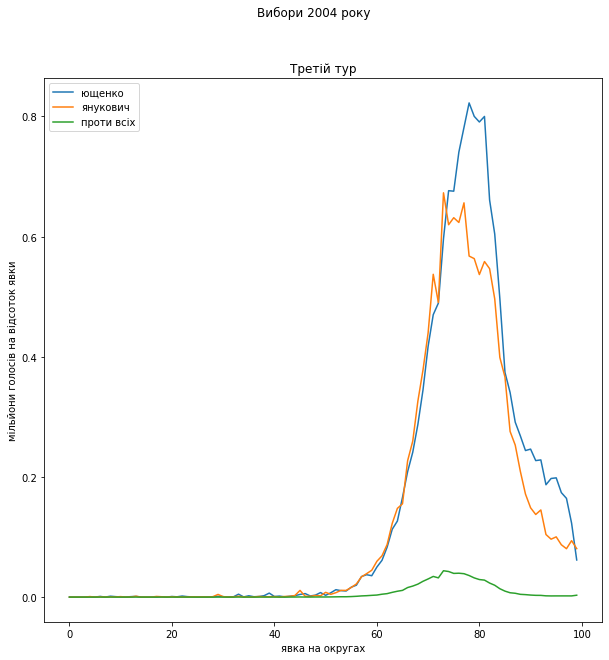

In [1]:
import matplotlib.pyplot as plt
from parse_tvk_data import *

last2004 = prepare_data(
    parse_election_tvk_data("vp2004","wp3352e3e.html",ua),
    lambda row: int(row[6])/int(row[3]) if int(row[3])>0 else 0,
    {"ющенко": 8, "янукович": 9, "проти всіх": 10}
)

fig=plt.figure()
fig.set_size_inches(10 , 10, forward=True)
fig.suptitle("Вибори 2004 року")
fig.show()

ax=fig.add_subplot(111)
for name in last2004.keys():
    ax.plot(list(range(100)),last2004[name], label=name)
    pass
ax.title.set_text("Третій тур")
ax.set_xlabel("явка на дільницях")
ax.set_ylabel("мільйони голосів на відсоток явки")
ax.legend(loc=2)

plt.draw()


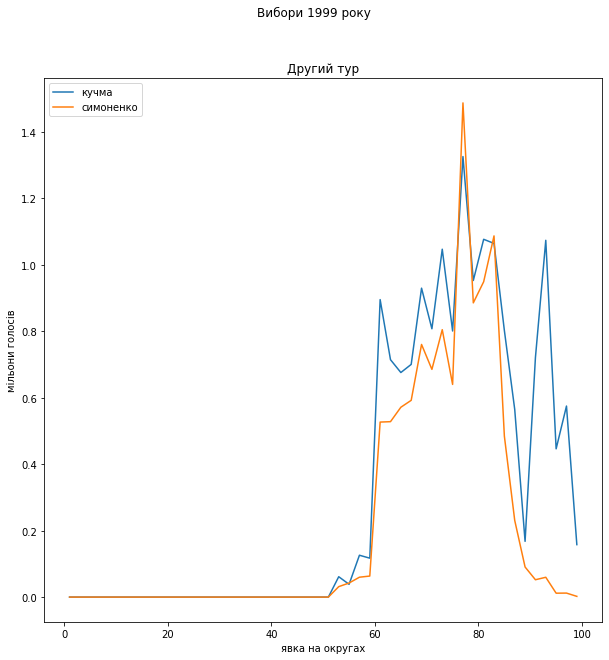

In [4]:
def get_columns(total_count, source):
    with open(source, 'r') as content_file:
        content = content_file.read()
        pass
    counter=0
    prev=0
    for item in content.split():
        if (counter%total_count)==0:
            if counter>0:
                if line[0]<=prev:
                    print(line)
                    print("WRONG")
                    return
                yield line
                prev=line[0]
                pass
            line=[]
            pass
        line.append(float(item))
        counter+=1
        pass
    if counter>0:
        yield line
        pass
    pass

def prepare_data(compr,source, reg):
    voices=[0]*(100//compr)
    for (idn,count, attendance) in source:
        if idn in reg:
            index=int(attendance*100/compr)
            if index>=len(districts):
                print("out of range for id",idn)
                pass
            else:
                voices[index] += count/1000000
                pass
            pass
        pass
    return voices

compr=2
def get_attendance(name):
    for item in get_columns(9,name):
        yield [item[0], item[4]/item[1]]
        pass
    pass

candidates2={
        "кучма": ("ukr_1999/1411-kuczma.txt",3,4),    
        "симоненко": ("ukr_1999/1411-simon.txt",3,4)    
    }

def get_2nd_for(name):
    cand=candidates2[name]
    for att,voices in zip(get_attendance("ukr_1999/1411-general.txt"),get_columns(cand[2],cand[0])):
        if att[0]==voices[0]:
            yield (att[0],voices[cand[1]],att[1])
            pass
        else:
            print("MISMATCH",att[0],voices[0])
            return
            pass
        pass
    pass

fig=plt.figure()
fig.set_size_inches(10 , 10, forward=True)
fig.suptitle("Вибори 1999 року")
fig.show()
ax=fig.add_subplot(111)
for name in ["кучма","симоненко"]:
    voices=prepare_data(compr,get_2nd_for(name),ua)
    ax.plot([x*compr+compr/2 for x in range(len(voices))],voices, label=name);
    pass
ax.title.set_text("Другий тур")
ax.set_xlabel("явка на округах")
ax.set_ylabel("мільони голосів на {compr} відсотків явки")
ax.legend(loc=2)
plt.draw()